In [3]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


You should consider upgrading via the 'D:\neww\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [12]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [13]:
FEATURES_ROOT = r"C:\Users\HP\Downloads\processed_dataset"

In [14]:
X_train, y_train = pickle.load(open(os.path.join(FEATURES_ROOT, "Train_features.pkl"), "rb"))
X_val, y_val = pickle.load(open(os.path.join(FEATURES_ROOT, "Validation_features.pkl"), "rb"))
X_test, y_test = pickle.load(open(os.path.join(FEATURES_ROOT, "Test_features.pkl"), "rb"))

In [23]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (2400, 128, 128), y_train shape: (2400,)
X_val shape: (300, 128, 128), y_val shape: (300,)
X_test shape: (300, 128, 128), y_test shape: (300,)


In [24]:
IMG_SIZE = X_train.shape[1:]  # Automatically take the shape from the dataset
NUM_CLASSES = 3 

In [40]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),  # Change 3 -> 1
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])


d:\neww\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.input_shape


(None, 128, 128, 1)

In [33]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [34]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 318ms/step - accuracy: 0.6532 - loss: 0.9008 - val_accuracy: 0.9267 - val_loss: 0.2227
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 307ms/step - accuracy: 0.9124 - loss: 0.2171 - val_accuracy: 0.9767 - val_loss: 0.0980
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 309ms/step - accuracy: 0.9786 - loss: 0.0617 - val_accuracy: 0.9800 - val_loss: 0.0506
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 303ms/step - accuracy: 0.9886 - loss: 0.0361 - val_accuracy: 0.9867 - val_loss: 0.0380
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 301ms/step - accuracy: 0.9939 - loss: 0.0201 - val_accuracy: 0.9967 - val_loss: 0.0221
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 300ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 300ms/step - accuracy: 0.9981 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 302ms/step - accuracy: 0.9978 - loss: 0.0080 - val_accu

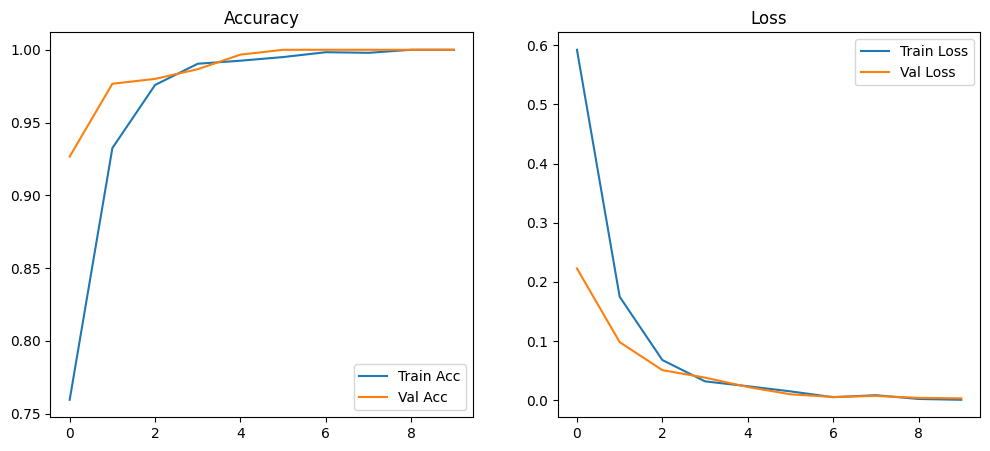

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")
plt.show()

In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}")

✅ Test Accuracy: 0.9967


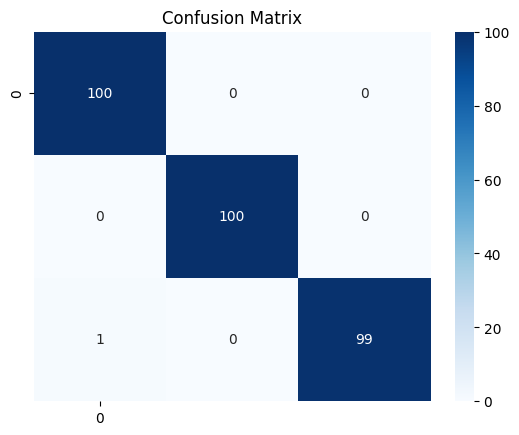

In [38]:
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=NUM_CLASSES, yticklabels=NUM_CLASSES)
plt.title("Confusion Matrix")
plt.show()

In [39]:
model.save("DenseNet121_stroke_model.h5")